# Summary of Findings

### Introduction
    Over the years, the New York Police Department (NYPD) has faced countless controversies from police brutality to blantent corruption. This study focuses around the question "Does the length that the complaint is open depend on gender in New York City?" To answer this question, we had to explore the data first and understand what kind of variables and observations we were working with. We recognized all the columns we needed to use to answer the question and utilize in our analysis. Such columns we recognized we needed to use was complainant_gender, month_received, year_received, month_closed, and year_closed. However, this information was not in usable state as we needed the duration of the complaint case. Therefore, to get all the information that we needed and in usable state, we had to clean our data.

### Cleaning and EDA
    In our data-cleaning process, we cleaned the original dataset through replacing missing values and adding new columns. We added 4 new columns to aid in our subsequent analysis. Date_received converts the month and year received columns into a date time column. However, day was not included in the dataset so every complaint filed is considered to be filed in the first day of the month. Date_closed is a similar column except it combines the columns, month and year closed instead. These two columns will be important for detemerming our estimate for the duration of the complaint. Complaint_length, is the difference in days between date_closed and date_received columns. While this may not be the exact time difference as we consider each complaint to be filed on the first day of the month, since cases are often times closed years after it’s opened, we believe these lengths to be a good enough estimate for the actual complaint length. This column is vital for our question of interest. Our last new column is contact_res_missing, which is a boolean column for which values are true if the value in the contact reason column is missing (and false if the value is not missing). This is important down the line when we investigate the missingness within our dataset. 

    We also investigated other missing values that weren’t classified as np.NaN. Our initial focus was working with columns that had numerical datatypes. The trivial case was replacing negative values. We found complainant_age_incident to be the only column with this issue. The nontrivial case was determining if entires equal to 0. We found the following columns to have values of 0: shield_no, complainant_age_incident, and precinct. For shield_no (shield number), through background information, understood that officers with a rank of Lieutenants or above do not have shield numbers (further confirmed in dataset that this was missing by design). As such, we replaced all 0’s with np.NaN. Our next column was complainant_age_incident. We felt that while 0 was quite peculiar, that many of the ages were under 18. There were small incidences for which the complainant age was less than 10, and then thousands in the teens. These seem to indicate that small ages are not invalid entries. As such, we believe that 0 does make sense (and did not replace it) as the complainant could be filed on behalf of their parents or guardian. Precinct was the last column in question. From background research, we did not find any source of precinct 0 and replace the 0 values with np.NaN. Our last focus on cleaning the columns was to deal with values within columns with string type. Here, we searched for the following keywords that may signify missing but classified as np.NaN: “missing”, “Missing”, “MISSING”, “unknown”, “Unknown”, and “UNKNOWN”. Here we only found complainant_ethinicity to be missing with the keyword “Unknown” and replaced them.
    
	Our final data-cleaning step is focusing on males and females within our dataset. We filter our dataset to only contain entires where the complainant_gender was male or female and set that dataframe to be data_mf.
    
    We begin our exploratory data analysis with inspecting the variables of interest separately with univariate statistics. We wanted to understand the difference in sample size between our two groups: males and females. We can see that the complaints are predominatly males with 24058 of complaints filed by males compared to the 5021 female complaints. The small about of female complaints may be concerning with the accuracy of our results. We then plotted the histogram of complaint lengths values and found that most of the complaints had a duration within 500 days. It seems like there are no values after 1000 but upon plotting a boxplot, we can see that due to the frequency of values these large outliers are not seen in the histogram. 
    After an introductory glance at complaint_length and complainant_gender, we continue with bivariate statistics. Plotting complaint lengths by gender, we see that the distributions cover the same area, but there seems to be more uniform for female complaints while the males seem more bell shaped. Then to analyze the missingness of contact reason, we plotted histograms and boxplots comparing contact reason with complaint_age_incident and year_received. For year recieved, the distributions see, rather different for missingness which is a good sign that the missingness of contact reason is dependent on year_received. The box plots supports this notion with two different looking distributions. Note the axis are scaled differently but shows the desiparity in number of nonmissing values to missing values. Comparing contact reason missingness with complainant_age_incident shows the two distributions looking closer than year_received. 
    For aggregates, we computed to mean and median for complaint_length based on complainant_gender. Here, we obseved that males usually had longer complaint durations than females. The mean being larger for both genders than their median implies that both distributions are skewed right. Males usually had their complaints last 314 days on average, about alitle more than two weeks more than females. We lasted aggregated the summary statistics for complaint_length groupedby complainant_gender. Here, we can observe that males have a wider distribution due to the larger range (largest - smallest) than female complaint_lengths. The longest male complaint was 3348 days, more than 2000 days longer than the longest female complaint case. Across all quartiles, males have longer complainant durations compared to females. 
    
    


### Assessment of Missingness
    After cleaning our dataset, our two main columns of interest: complainant_gender, and complaint_length do not contain missing values. As such, to explore the missingness of our dataset, we looked at the column, contact_reason. We believe contact_reason to not be NMAR (Not Missing At Random). This is because, possible reasons for the data to be missing are already described within the dataset. Within our cleaned dataset, only 140 our of approximately 29000 entries are missing for contact reason, leading us to suspect the missing may be MAR (Missing At Random) or MCAR (Missing Completely At Random). Some (but not limited to) columns we suspect that contact_reason is missing dependent on are year_received (older requests have more redactions), unique_mos_id (some officers may have more redactions on their files), and rank_now (higher ranked officials may have more of their information redacted). We carried out permutation tests on year_received and complainant_age_incident to determine if contact_reason is dependent on either of those columns. Here, we used a sample size of 5000 and a significance level (alpha level) of 0.05. For complainant_age_incident, we found a p-value of 0.104200 (about 10% of simulated values were atleast as extreme as what we observed), not statistically signficant to reject the null hypothesis. Here, this means that we do not have enough evidence to conclude that contact_reason being missing is dependent on the age of the complainant at the incident. On the other hand, for year_received, the second permutation test had a p-value of 0.0 (none of the simulated values were atleast as extreme as what we observed) signifying us to reject the null hypothesis. Since our p-value is less than our significance level (0.0 < 0.05), we do have enough evidence to reject the null hypothesis. As a result, we find that contact_reason missing values are dependent on the year_received. Since we investigated the missingness of a column that does not pertain to our question of interest, its hard to make of the helpfulness of the results from the permutation tests. 


### Hypothesis Test
    For our hypothesis test, we first had to figure out what type of test we would perform. We decided to do A/B testing on complainant_gender and complaint_length from this dataset and see whether or not the distributions come from the same distribution. To do this, we needed to decide upon a test statistic so we used difference of means between male and female complaint lengths. Then, we figured out our null and alternative hypotheses. Our null hypothesis is that the average complaint length of males is equal to the average complaint length of females. Our alternative hypothesis is that the average complaint length of males is NOT equal to the average complaint length of females. After our hypotheses, we calculated our observed test statistic, being the difference of means, as 15.37. After, we created a function called simulate_null to shuffle our complaint_length values and find the difference of means again between males and females. After this, to find our p-value, we compared our observed test statistic to our simulated statistics and resulted in a p-value of 0.0. Therefore, with these results, using a significance level of 0.05, we found that none of the simulations were more extreme than observed. Thus, our result is statistically significant and we reject our null hypothesis that the average complaint length of males is equal to the average complaint length of females.


### Improvements
    While, we did discover interesting results through our analysis, there is still room for improvement. Firstly, we could've added a difference of means permutation test for the missingness. While KS statistic is more widely used, difference of means is a great starting point for understanding the two distributions. Also, another improvement could be using larger sample sizes for our permutation and hypothesis tests. An alpha level of 0.05 not exactly that rare (rejects 1 in 20 times) so using larger sample sizes may help with getting a more accurate read on our results. The dataset used was only a subportion chosen by ProPublica. They mainly choose complaints in which the investigators found allegations that did occur. Using a dataset where the allegations were found to not happen or unfounded would be interesting and may lead to different results.
	


# Code

## Getting the dataset and some introductory analysis

In [1]:
# importing packages
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
from scipy.stats import ks_2samp

In [2]:
# Reading in the Dataset
data_fp = os.path.join('data','allegations.csv')
data = pd.read_csv(data_fp)

In [491]:
# head of data
data.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [492]:
# Get Datatypes for each column of data
data.dtypes

unique_mos_id                 int64
first_name                   object
last_name                    object
command_now                  object
shield_no                     int64
complaint_id                  int64
month_received                int64
year_received                 int64
month_closed                  int64
year_closed                   int64
command_at_incident          object
rank_abbrev_incident         object
rank_abbrev_now              object
rank_now                     object
rank_incident                object
mos_ethnicity                object
mos_gender                   object
mos_age_incident              int64
complainant_ethnicity        object
complainant_gender           object
complainant_age_incident    float64
fado_type                    object
allegation                   object
precinct                    float64
contact_reason               object
outcome_description          object
board_disposition            object
dtype: object

In [493]:
# Checks for Missing or Null values
for col in data.columns:
    num_null = data[col].isnull().sum()
    col_string = col + ":" + str(num_null)
    print(col_string)

unique_mos_id:0
first_name:0
last_name:0
command_now:0
shield_no:0
complaint_id:0
month_received:0
year_received:0
month_closed:0
year_closed:0
command_at_incident:1544
rank_abbrev_incident:0
rank_abbrev_now:0
rank_now:0
rank_incident:0
mos_ethnicity:0
mos_gender:0
mos_age_incident:0
complainant_ethnicity:4464
complainant_gender:4195
complainant_age_incident:4812
fado_type:0
allegation:1
precinct:24
contact_reason:199
outcome_description:56
board_disposition:0


In [494]:
# checks for 0's in numeric datatypes
for col in data.columns:
    if(data[col].dtype == 'float' or data[col].dtype == "int64"):
        num_null = (data[col] == 0).sum()
        col_string = col + ":" + str(num_null)
        print(col_string)

unique_mos_id:0
shield_no:5392
complaint_id:0
month_received:0
year_received:0
month_closed:0
year_closed:0
mos_age_incident:0
complainant_age_incident:2
precinct:21


### Cleaning and EDA

#### Cleaning Dataset

In [3]:
# Cleaning Section

## Cleans "Unknown values"
data.complainant_ethnicity = (data.complainant_ethnicity.replace("Unknown", np.NaN))

## Cleans 0 values in precinct
data.precinct = data.precinct.replace(0, np.NaN)

## Cleans Missing values from complainant age incident
data.complainant_age_incident = data.complainant_age_incident.replace(-1, np.NaN).replace(-4301, np.NaN)

## Cleans Missing values from shield number
data.shield_no = data.shield_no.replace(0, np.NaN)

## Creates a date column of month and year (received and closed) in the format "Month - Year" then converts string column to datetime
data["date_received"] = data.month_received.astype(str) + "-" + data.year_received.astype(str)
data["date_received"] = pd.to_datetime(data['date_received'])

data["date_closed"] = data.month_closed.astype(str) + "-" + data.year_closed.astype(str)
data["date_closed"] = pd.to_datetime(data['date_closed'])

## Creates a column that computes the total time the case was open
data['complaint_length'] = (data.date_closed - data.date_received).dt.days

## Creates a new column for if the ethnicity is missing
data['contact_res_missing'] = data.contact_reason.isnull()

## Filters the dataset to get only males and females (only look at the binary genders)
data_mf = data[data['complainant_gender'].isin(["Male", "Female"])]

## Main Dataset should be data_mf

In [487]:
data_mf.contact_reason.unique() # tbd

array(['Report-domestic dispute', 'Moving violation',
       'PD suspected C/V of violation/crime - street',
       'C/V telephoned PCT', 'Other', 'Regulatory inspection',
       'Other violation of VTL', 'Parking violation',
       'Execution of search warrant',
       'PD suspected C/V of violation/crime - bldg', nan,
       'Execution of arrest/bench warrant', 'Report-dispute',
       'PD suspected C/V of violation/crime - auto',
       'Report-possession/sale of narcotics', 'Report-noise/disturbance',
       'C/V intervened on behalf of/observed encounter w/3rd party',
       'Traffic accident', 'Aided case', 'EDP aided case',
       'C/V at PCT to file complaint of crime', 'Report of other crime',
       'PD auto checkpoint', 'Demonstration/protest',
       'C/V requested investigation of crime',
       'C/V at PCT to obtain information', 'CV already in custody',
       'Report-gun possession/shots fired',
       'C/V requested info from officer',
       'PD suspected C/V of viola

In [489]:
#Cleaned dataset (focusing on gender)
data_mf.contact_res_missing.value_counts()

False    28939
True       140
Name: contact_res_missing, dtype: int64

#### Exploratory Data Analysis

##### Univariate Statistics

In [61]:
# Gets the number of male and female complainants (Univariate)
data_mf.complainant_gender.value_counts()

Male      24058
Female     5021
Name: complainant_gender, dtype: int64

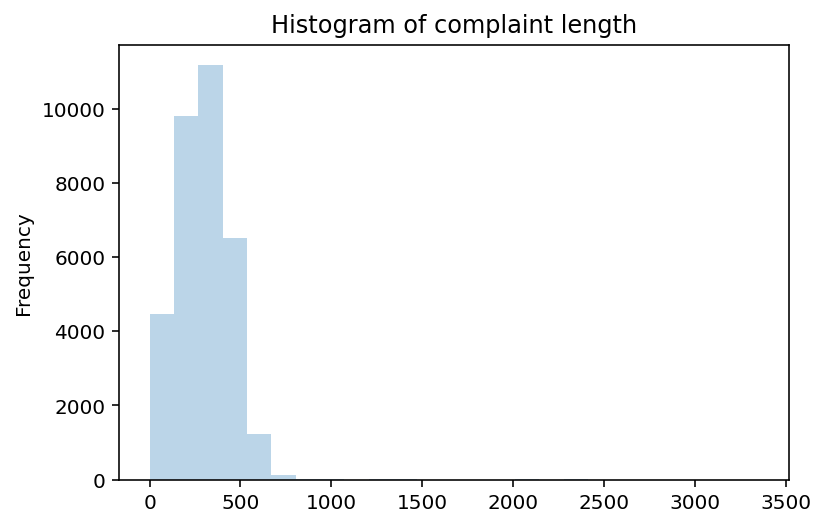

In [331]:
#looking at entire distribution of complaint_length as a whole
data['complaint_length'].plot(kind = "hist", bins = 25, alpha = 0.3, title = 'Histogram of complaint length')

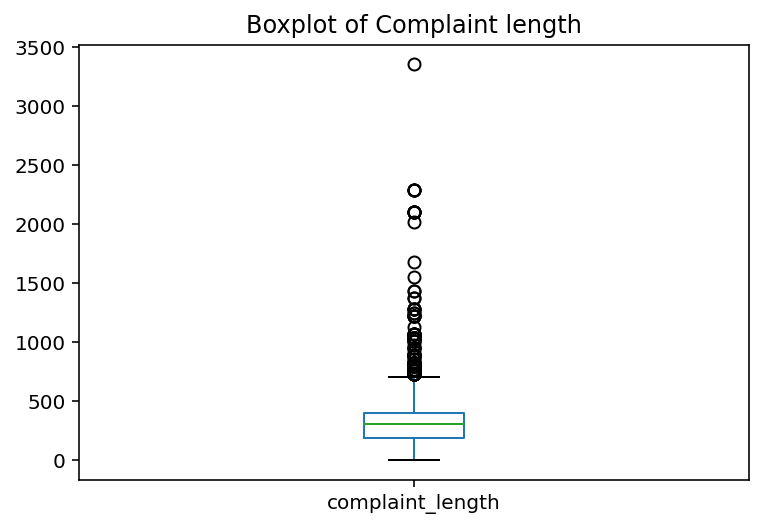

In [330]:
# everything boxplot
data['complaint_length'].plot(kind = "box", title = 'Boxplot of Complaint length')

##### Bivariate Statistics

complainant_gender
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: complaint_length, dtype: object

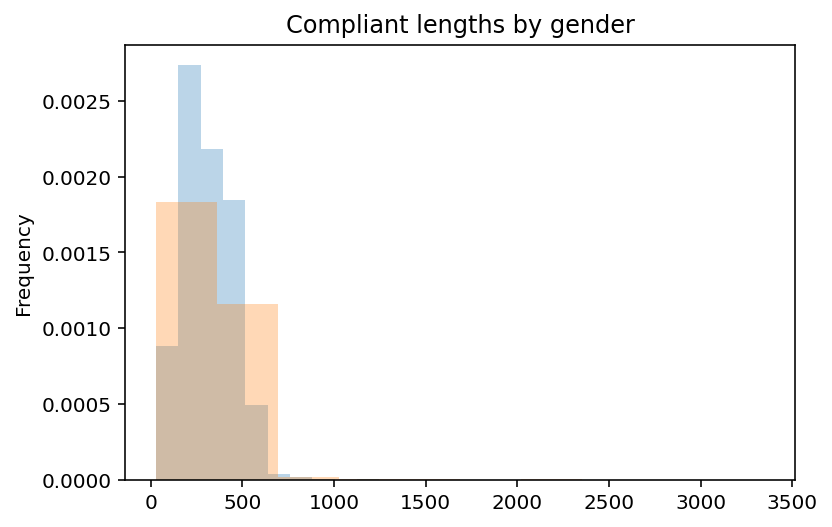

In [328]:
# grouping by gender
data_mf.groupby('complainant_gender')['complaint_length'].plot(kind ="hist", alpha = 0.3, density = True, title = "Compliant lengths by gender")

contact_res_missing
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: year_received, dtype: object

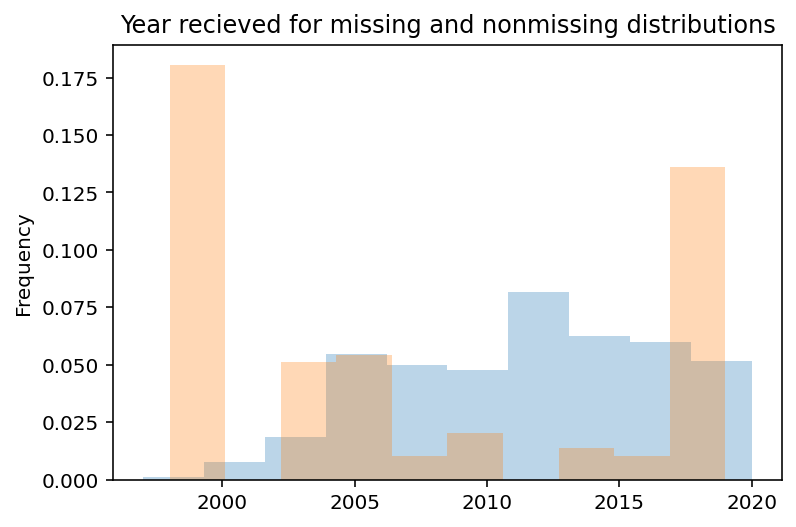

In [327]:
# comparing contact reason with year received
data.outcome_description.value_counts()
data_mf.groupby('contact_res_missing')['year_received'].plot(kind = 'hist', density = True, alpha = 0.3, title = "Year received for missing and nonmissing distributions")

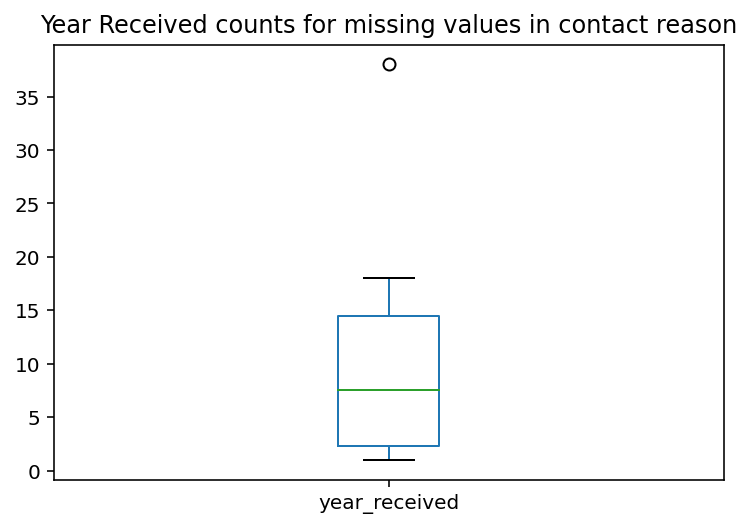

In [326]:
# box plot for number of missing entires for contact reason by year
data_mf.loc[data_mf.contact_res_missing, 'year_received'].value_counts().sort_index().plot(kind = 'box', title = 'Year Received counts for missing values in contact reason')

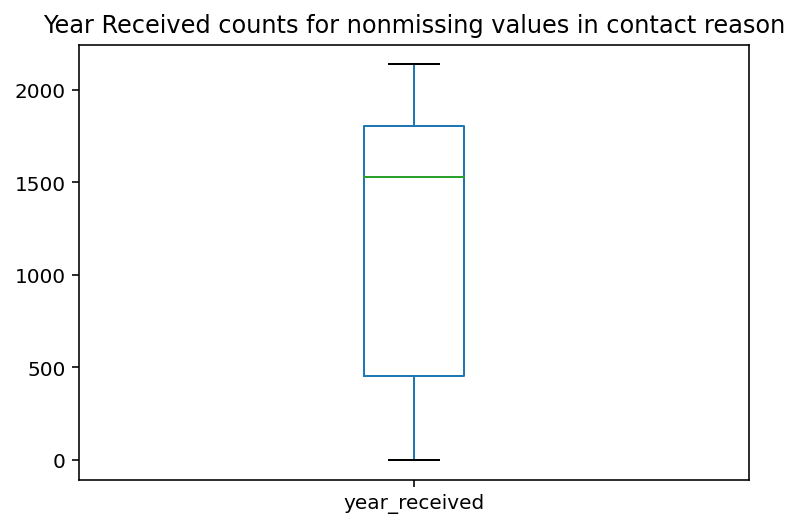

In [325]:
# box plot for number of nonmissing entires for contact reason by year
data_mf.loc[data_mf.contact_res_missing == False, 'year_received'].value_counts().sort_index().plot(kind = 'box', title = 'Year Received counts for nonmissing values in contact reason')

contact_res_missing
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: complainant_age_incident, dtype: object

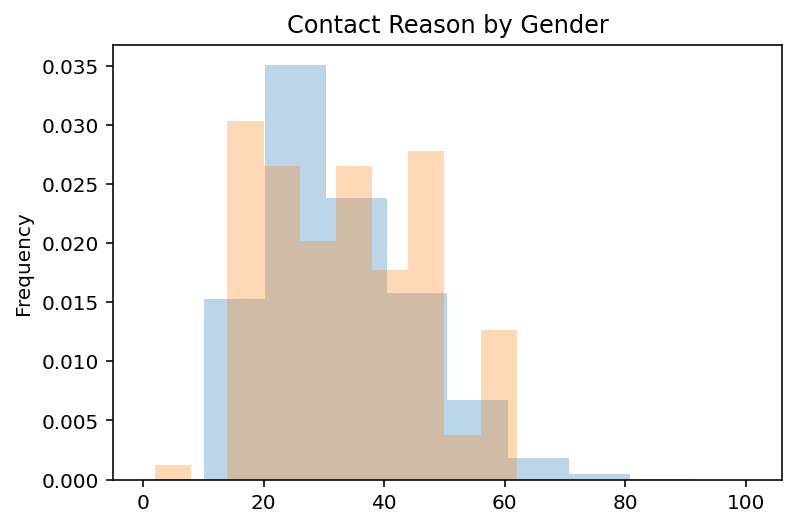

In [324]:
# comapring contact reason with age 
data_mf.groupby('contact_res_missing')['complainant_age_incident'].plot(kind = 'hist', density = True, alpha = 0.3, title = "Contact Reason by by complaint_age_incident")

##### Interesting Aggregates: Choose columns to groupby and examine aggregate statistics

In [292]:
#aggregate by mean
data_mf.groupby('complainant_gender')['complaint_length'].mean()

complainant_gender
Female    298.834694
Male      314.202427
Name: complaint_length, dtype: float64

In [293]:
#aggregate by median
data_mf.groupby('complainant_gender')['complaint_length'].median()

complainant_gender
Female    275
Male      304
Name: complaint_length, dtype: int64

In [294]:
#aggregate by summary statistics
data_mf.groupby('complainant_gender')['complaint_length'].describe()

,count,mean,std,min,25%,50%,75%,max
complainant_gender,,,,,,,,
Female,5021.0,298.834694,134.289715,28.0,184.0,275.0,396.0,1247.0
Male,24058.0,314.202427,143.507623,30.0,212.0,304.0,424.0,3348.0


### Assessment of Missingness

#### Permutation Testing 1

##### Determining if contact reason being missing is dependent on complainant age incident using Kolmogorov-Smirnov Test statistic

In [497]:
# observed test statistic
obs = ks_2samp(data_mf.loc[data_mf['contact_res_missing'], 'complainant_age_incident'], data_mf.loc[data_mf['contact_res_missing']==False, 'complainant_age_incident']).statistic
obs

0.10253661642963274

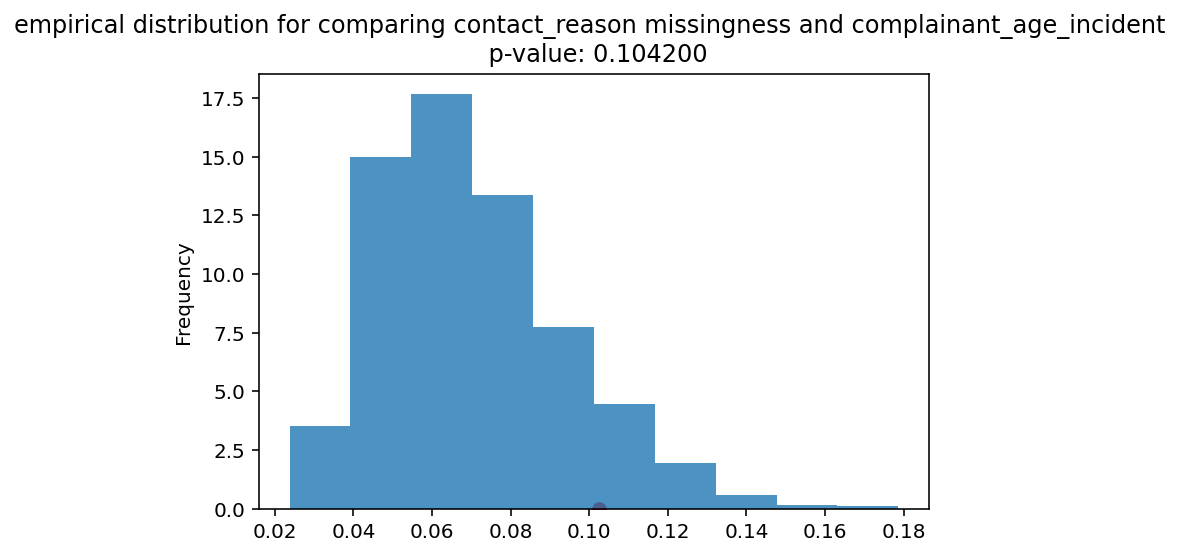

In [498]:
# Simulation
N = 5000 # number of reptitions

ks_list = []
for _ in range(N): # simulations
    
    # shuffle the contact_res_missing column
    shuffled_col = data_mf.contact_res_missing.sample(replace = False, frac = 1).reset_index(drop=True)
    
    # Shuffled dataframe
    shuffled = data_mf.assign(**{"contact_res_missing": shuffled_col})
    
    
    # Computing simulated Kolmogorov-Smirnov Test Statistic
    grps = shuffled.groupby('contact_res_missing')['complainant_age_incident']
    
    ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
    ks_list.append(ks)

# Calculate p-value
pval = np.mean(np.array(ks_list) > obs)

# plotting empirical distribution
pd.Series(ks_list).plot(kind = 'hist', density = True, alpha = 0.8, title = 'empirical distribution for comparing contact_reason missingness and complainant_age_incident \n p-value: %f' %pval)
plt.scatter(obs, 0, color = 'red', s = 40)

## Permutation Testing 2

### Determining if contact reason being missing is dependent on year received column

In [499]:
# observed test statistic
obs = ks_2samp(data_mf.loc[data_mf['contact_res_missing'], 'year_received'], data_mf.loc[data_mf['contact_res_missing']==False, 'year_received']).statistic
obs

0.46436988147482633

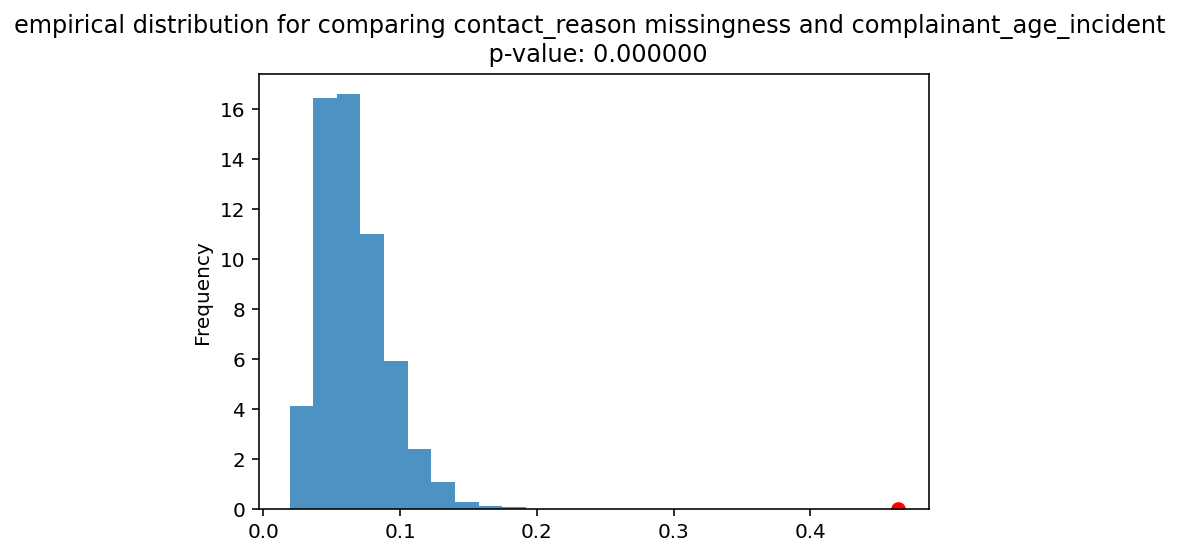

In [500]:
# Simulation
N = 5000 # number of reptitions

ks_list = []
for _ in range(N): # simulations
    
    # shuffle the contact_res_missing column
    shuffled_col = data_mf.contact_res_missing.sample(replace = False, frac = 1).reset_index(drop=True)
    
    # Shuffled dataframe
    shuffled = data_mf.assign(**{"contact_res_missing": shuffled_col})
    
    # Computing simulated Kolmogorov-Smirnov Test Statistic
    grps = shuffled.groupby('contact_res_missing')['year_received']
    
    ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
    ks_list.append(ks)

# Calculate p-value
pval = np.mean(np.array(ks_list) > obs)

# plotting empirical distribution
pd.Series(ks_list).plot(kind = 'hist', density = True, alpha = 0.8, title = 'empirical distribution for comparing contact_reason missingness and complainant_age_incident \n p-value: %f' %pval)
plt.scatter(obs, 0, color = 'red', s = 40)

### Hypothesis Test

In [4]:
# functions for hypothesis testing
def diff_of_means(data):
    males = data[data['complainant_gender'] == 'Male']
    females = data[data['complainant_gender'] == 'Female']
    males_mean = males['complaint_length'].mean()
    females_mean = females['complaint_length'].mean()
    return males_mean - females_mean

def simulate_null(data):
    df = data.copy()
    values = df['complaint_length'].values
    shuffled = np.random.shuffle(values)
    df['complaint_length'] = values
    ans = diff_of_means(df)
    return ans

def pval(data):
    test = diff_of_means(data)
    simulations = np.column_stack([simulate_null(data) for _ in range(5000)])
    return np.count_nonzero(simulations > test) / 5000

In [5]:
# hypothesis testing

# observed test statistic
obs = diff_of_means(data_mf)

simulations = np.column_stack([simulate_null(data_mf) for _ in range(5000)])

p_value = np.count_nonzero(simulations > obs) / 5000

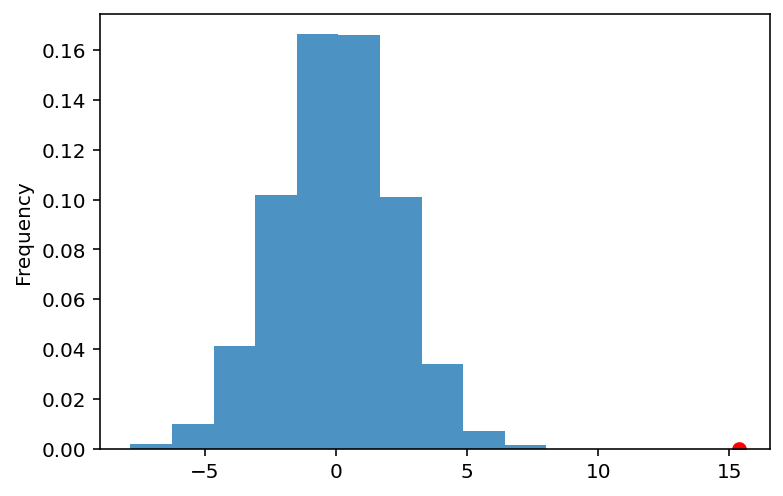

In [6]:
# plotting results
pd.Series(simulations[0]).plot(kind = 'hist', density = True, alpha = 0.8) #title = 'p-value: %f' %pval)
plt.scatter(obs, 0, color = 'red', s = 40)

In [9]:
# statistics from hypothesis testing
p_value,obs

(0.0, 15.367733182947688)